# Fourier Series

## Intuitive Understanding

The Fourier series is a way to represent a periodic function as a sum of sinusoidal functions (sines and cosines). The idea is that any periodic signal can be decomposed into a sum of simple oscillating functions. This decomposition allows us to analyze the frequency content of the signal, which is fundamental in signal processing.

## Mathematical Formulation

A periodic function $ f(t) $ with period $ T $ can be represented as a Fourier series:

$$ f(t) = a_0 + \sum_{n=1}^{\infty} \left( a_n \cos\left( \frac{2\pi n t}{T} \right) + b_n \sin\left( \frac{2\pi n t}{T} \right) \right) $$

The coefficients $ a_0 $, $ a_n $, and $ b_n $ are given by:

$$ a_0 = \frac{1}{T} \int_0^T f(t) \, dt $$

$$ a_n = \frac{2}{T} \int_0^T f(t) \cos\left( \frac{2\pi n t}{T} \right) \, dt $$

$$ b_n = \frac{2}{T} \int_0^T f(t) \sin\left( \frac{2\pi n t}{T} \right) \, dt $$

### *Example 1*: Fourier Series of a Square Wave

#### Step-by-Step

Consider a square wave $ f(t) $ with period $ T = 2\pi $ defined as:

$$ f(t) = \begin{cases} 
1 & \text{if } 0 \leq t < \pi \\
-1 & \text{if } \pi \leq t < 2\pi 
\end{cases} $$

1. Calculate $ a_0 $:

$$ a_0 = \frac{1}{2\pi} \int_0^{2\pi} f(t) \, dt = 0 $$

2. Calculate $ a_n $:

$$ a_n = \frac{2}{2\pi} \int_0^{2\pi} f(t) \cos(n t) \, dt = 0 $$

3. Calculate $ b_n $:

$$ b_n = \frac{2}{2\pi} \left( \int_0^{\pi} \sin(n t) \, dt - \int_{\pi}^{2\pi} \sin(n t) \, dt \right) $$

$$ b_n = \frac{4}{n\pi} \left( 1 - (-1)^n \right) $$

$$ b_n = \begin{cases} 
\frac{4}{n\pi} & \text{if } n \text{ is odd} \\
0 & \text{if } n \text{ is even} 
\end{cases} $$

Thus, the Fourier series of the square wave is:

$$ f(t) = \sum_{n=1, 3, 5, \ldots}^{\infty} \frac{4}{n\pi} \sin(nt) $$

illustration"

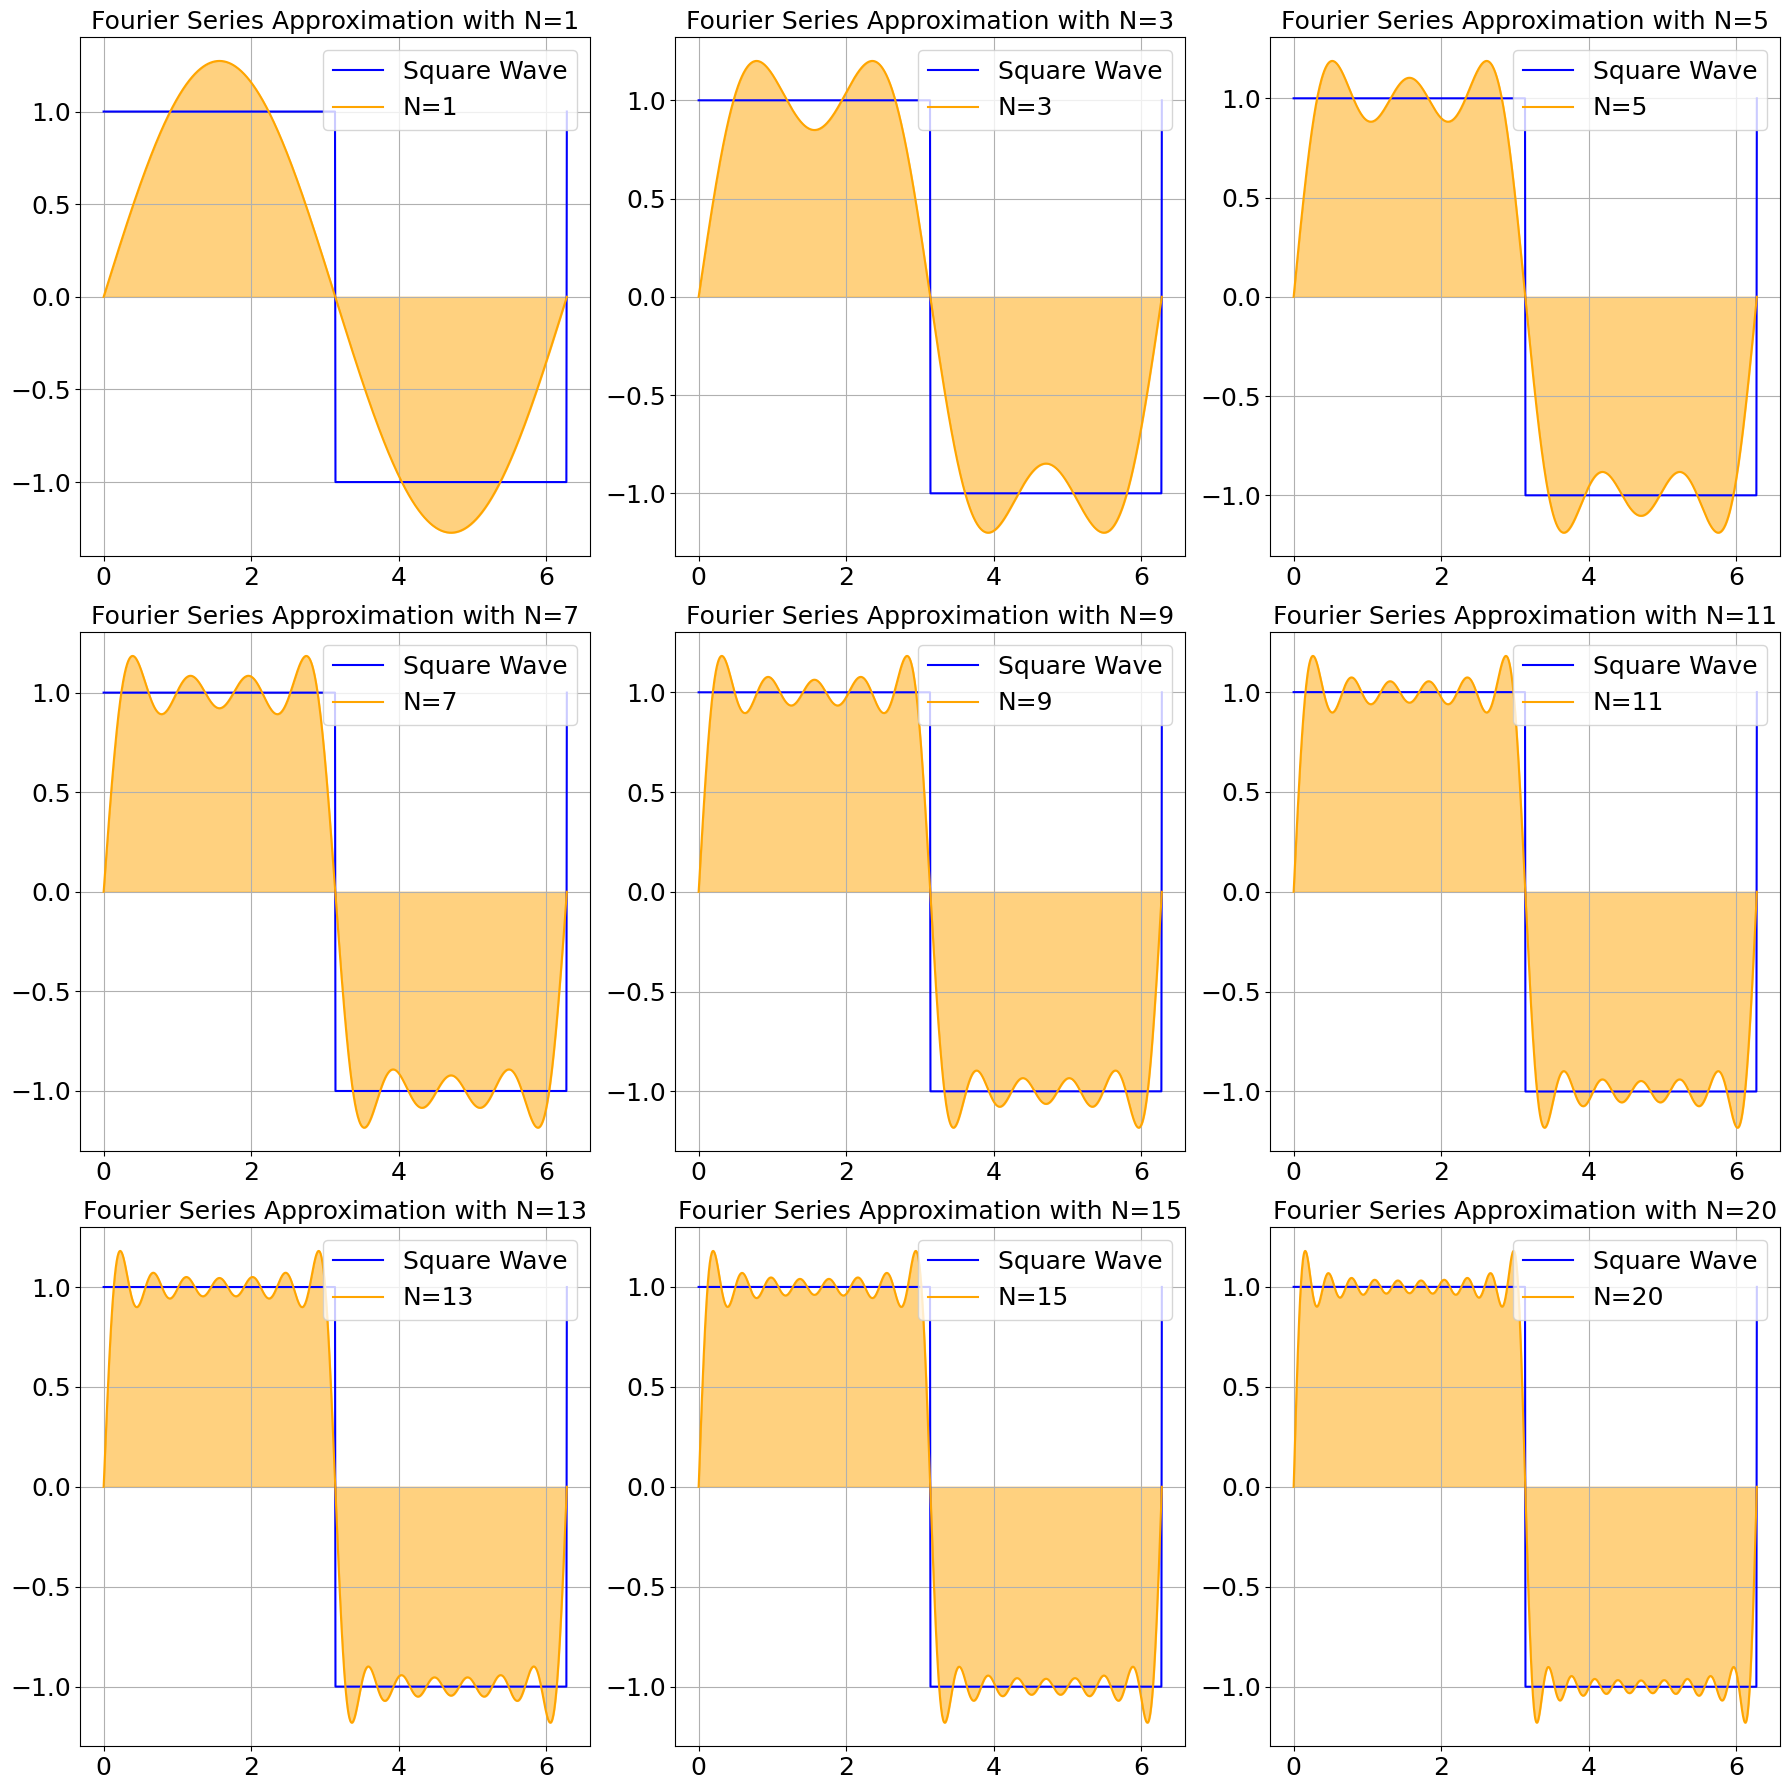

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Define the square wave function
def square_wave(t):
    return np.where((t % (2 * np.pi)) < np.pi, 1, -1)

# Time array
t = np.linspace(0, 2 * np.pi, 1000)

# Calculate Fourier series approximation
def fourier_series_square_wave(t, N):
    y = np.zeros_like(t)
    for n in range(1, N+1, 2):
        y += (4 / (n * np.pi)) * np.sin(n * t)
    return y

# Plotting
fig, axs = plt.subplots(3, 3, figsize=(18, 18))

# Font size
fontsize = 18

# Intermediate steps for visualization
Ns = [1, 3, 5, 7, 9, 11, 13, 15, 20]
for i, N in enumerate(Ns):
    ax = axs.flat[i]
    y = fourier_series_square_wave(t, N)
    ax.plot(t, square_wave(t), label='Square Wave', color='blue')
    ax.plot(t, y, label=f'N={N}', color='orange')
    ax.fill_between(t, 0, y, color='orange', alpha=0.5)
    ax.set_title(f'Fourier Series Approximation with N={N}', fontsize=fontsize)
    ax.legend(fontsize=fontsize, loc='upper right')
    ax.tick_params(axis='both', which='major', labelsize=fontsize)
    ax.grid(True)

plt.tight_layout()
plt.show()

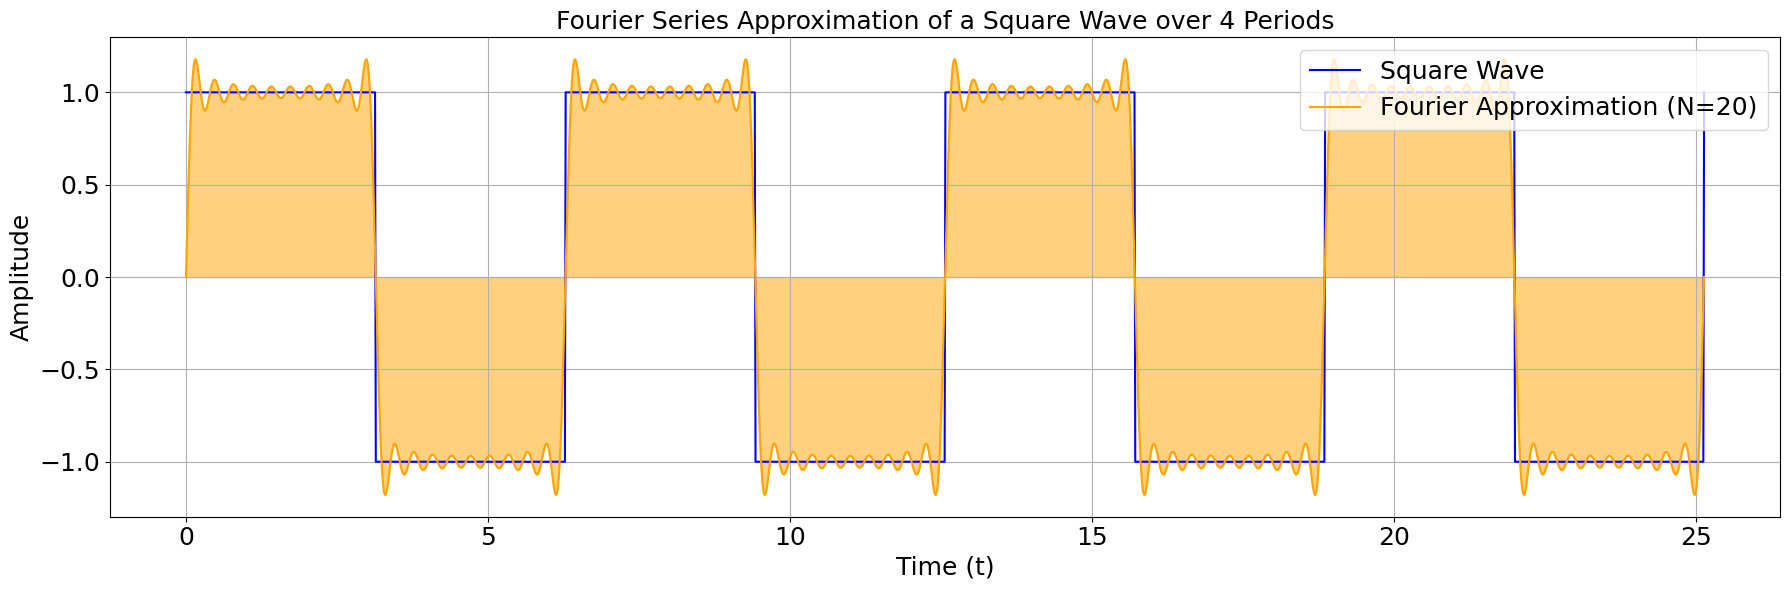

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define the square wave function
def square_wave(t):
    return np.where((t % (2 * np.pi)) < np.pi, 1, -1)

# Extended time array for 4 periods
t = np.linspace(0, 8 * np.pi, 2000)

# Calculate Fourier series approximation
def fourier_series_square_wave(t, N):
    y = np.zeros_like(t)
    for n in range(1, N+1, 2):
        y += (4 / (n * np.pi)) * np.sin(n * t)
    return y

# Plotting
fig, ax = plt.subplots(figsize=(18, 6))

# Number of harmonics
N = 20

# Plot Fourier series approximation for 4 periods
y = fourier_series_square_wave(t, N)
ax.plot(t, square_wave(t), label='Square Wave', color='blue')
ax.plot(t, y, label=f'Fourier Approximation (N={N})', color='orange')
ax.fill_between(t, 0, y, color='orange', alpha=0.5)

# Setting labels and titles
fontsize = 18
ax.set_xlabel('Time (t)', fontsize=fontsize)
ax.set_ylabel('Amplitude', fontsize=fontsize)
ax.set_title('Fourier Series Approximation of a Square Wave over 4 Periods', fontsize=fontsize)
ax.legend(fontsize=fontsize, loc='upper right')
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.grid(True)

plt.tight_layout()
plt.show()


#### 3D illustration

We can visualize this same graph but in a 3D fashion to understand that the final curve is a summation of all other curves.

To provide a 3D understanding of the Fourier series approximation of a square wave with sine harmonics, we can plot the harmonics and their cumulative sum in a 3D plot. This visualization helps in understanding how each sine harmonic contributes to the Fourier series approximation of the square wave.

- **Square Wave Function**: Defined as a periodic function with values 1 and -1.
- **Time Array**: Spanning one period $ [0, 2\pi] $.
- **Fourier Series Approximation**: The sum of sine harmonics with odd indices.
- **3D Plot**: 
  - **X-Axis**: Time.
  - **Y-Axis**: Index of the harmonics.
  - **Z-Axis**: Amplitude of the harmonics.
  - The plot includes individual harmonics, their cumulative sum, and the original square wave for comparison.

This visualization helps in understanding how each sine harmonic contributes to the Fourier series approximation of the square wave. The 3D plot shows the progression of the approximation as more harmonics are added.

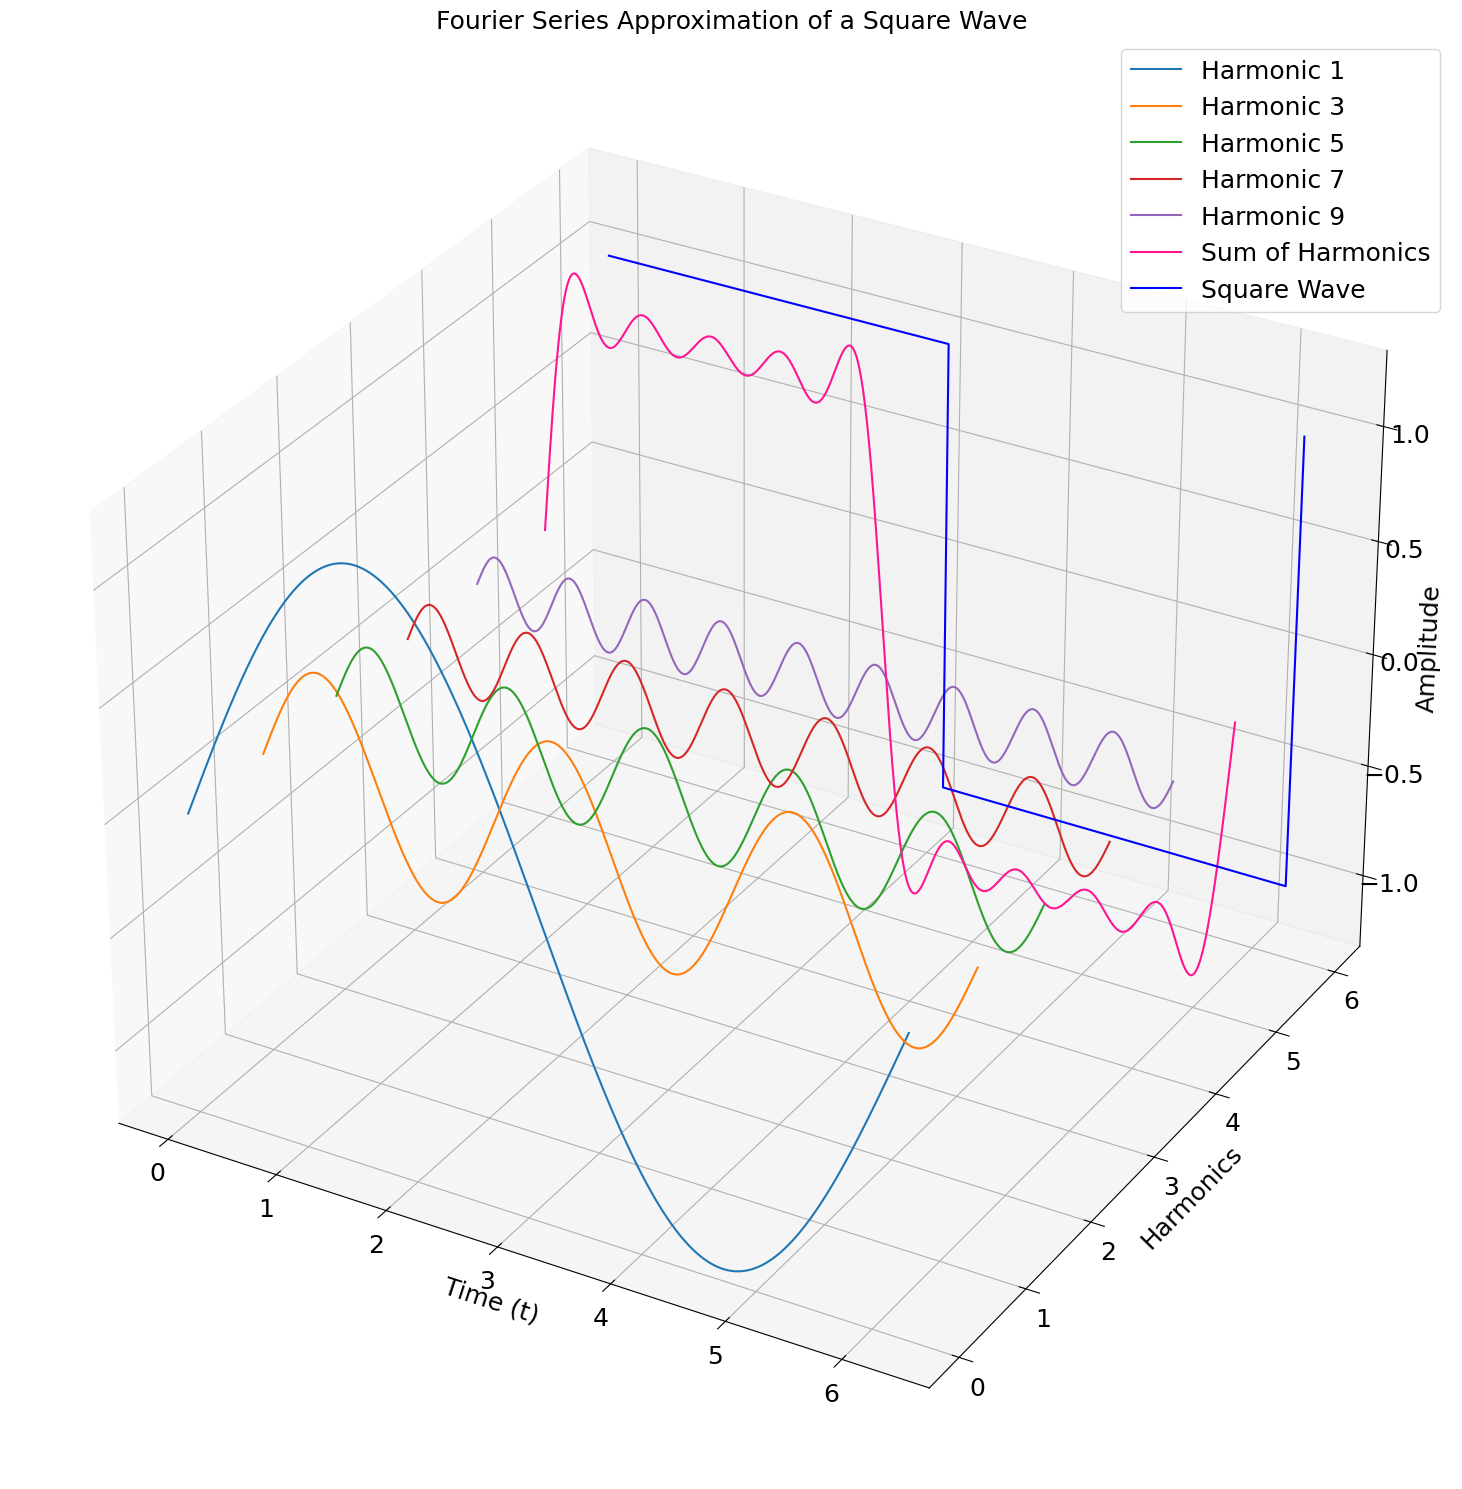

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the square wave function
def square_wave(t):
    return np.where((t % (2 * np.pi)) < np.pi, 1, -1)

# Time array
t = np.linspace(0, 2 * np.pi, 1000)

# Calculate Fourier series approximation
def fourier_series_square_wave(t, N):
    y = np.zeros_like(t)
    harmonics = []
    for n in range(1, N+1, 2):
        harmonic = (4 / (n * np.pi)) * np.sin(n * t)
        harmonics.append(harmonic)
        y += harmonic
    return y, harmonics

# Number of harmonics
N = 9

# Perform Fourier series approximation
y, harmonics = fourier_series_square_wave(t, N)

# Plotting
fig = plt.figure(figsize=(18, 15))
ax = fig.add_subplot(111, projection='3d')

# Font size
fontsize = 18

# Plot the individual harmonics
for i, harmonic in enumerate(harmonics):
    ax.plot(t, harmonic, zs=i, zdir='y', label=f'Harmonic {2*i+1}')

# Plot the sum of harmonics
ax.plot(t, y, zs=len(harmonics), zdir='y', label='Sum of Harmonics', color='deeppink')

# Plot the original square wave
ax.plot(t, square_wave(t), zs=len(harmonics)+1, zdir='y', label='Square Wave', color='blue')

# Setting labels and titles
ax.set_xlabel('Time (t)', fontsize=fontsize)
ax.set_ylabel('Harmonics', fontsize=fontsize)
ax.set_zlabel('Amplitude', fontsize=fontsize)
ax.set_title('Fourier Series Approximation of a Square Wave', fontsize=fontsize)
ax.legend(fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize)

plt.tight_layout()
plt.show()


### *Example 2*: Fourier Series of a Sawtooth Wave

#### Step-by-Step

Consider a sawtooth wave $ f(t) $ with period $ T = 2\pi $ defined as:

$$ f(t) = t - \pi $$

1. Calculate $ a_0 $:

$$ a_0 = \frac{1}{2\pi} \int_0^{2\pi} (t - \pi) \, dt = 0 $$

2. Calculate $ a_n $:

$$ a_n = \frac{2}{2\pi} \int_0^{2\pi} (t - \pi) \cos(n t) \, dt $$

$$ a_n = \frac{2}{2\pi} \left( \int_0^{2\pi} t \cos(n t) \, dt - \pi \int_0^{2\pi} \cos(n t) \, dt \right) = 0 $$

3. Calculate $ b_n $:

$$ b_n = \frac{2}{2\pi} \int_0^{2\pi} (t - \pi) \sin(n t) \, dt $$

$$ b_n = \frac{2}{2\pi} \left( \int_0^{2\pi} t \sin(n t) \, dt - \pi \int_0^{2\pi} \sin(n t) \, dt \right) $$

$$ b_n = \frac{-2}{n} $$

Thus, the Fourier series of the sawtooth wave is:

$$ f(t) = -\sum_{n=1}^{\infty} \frac{2}{n} \sin(nt) $$

Illustration:

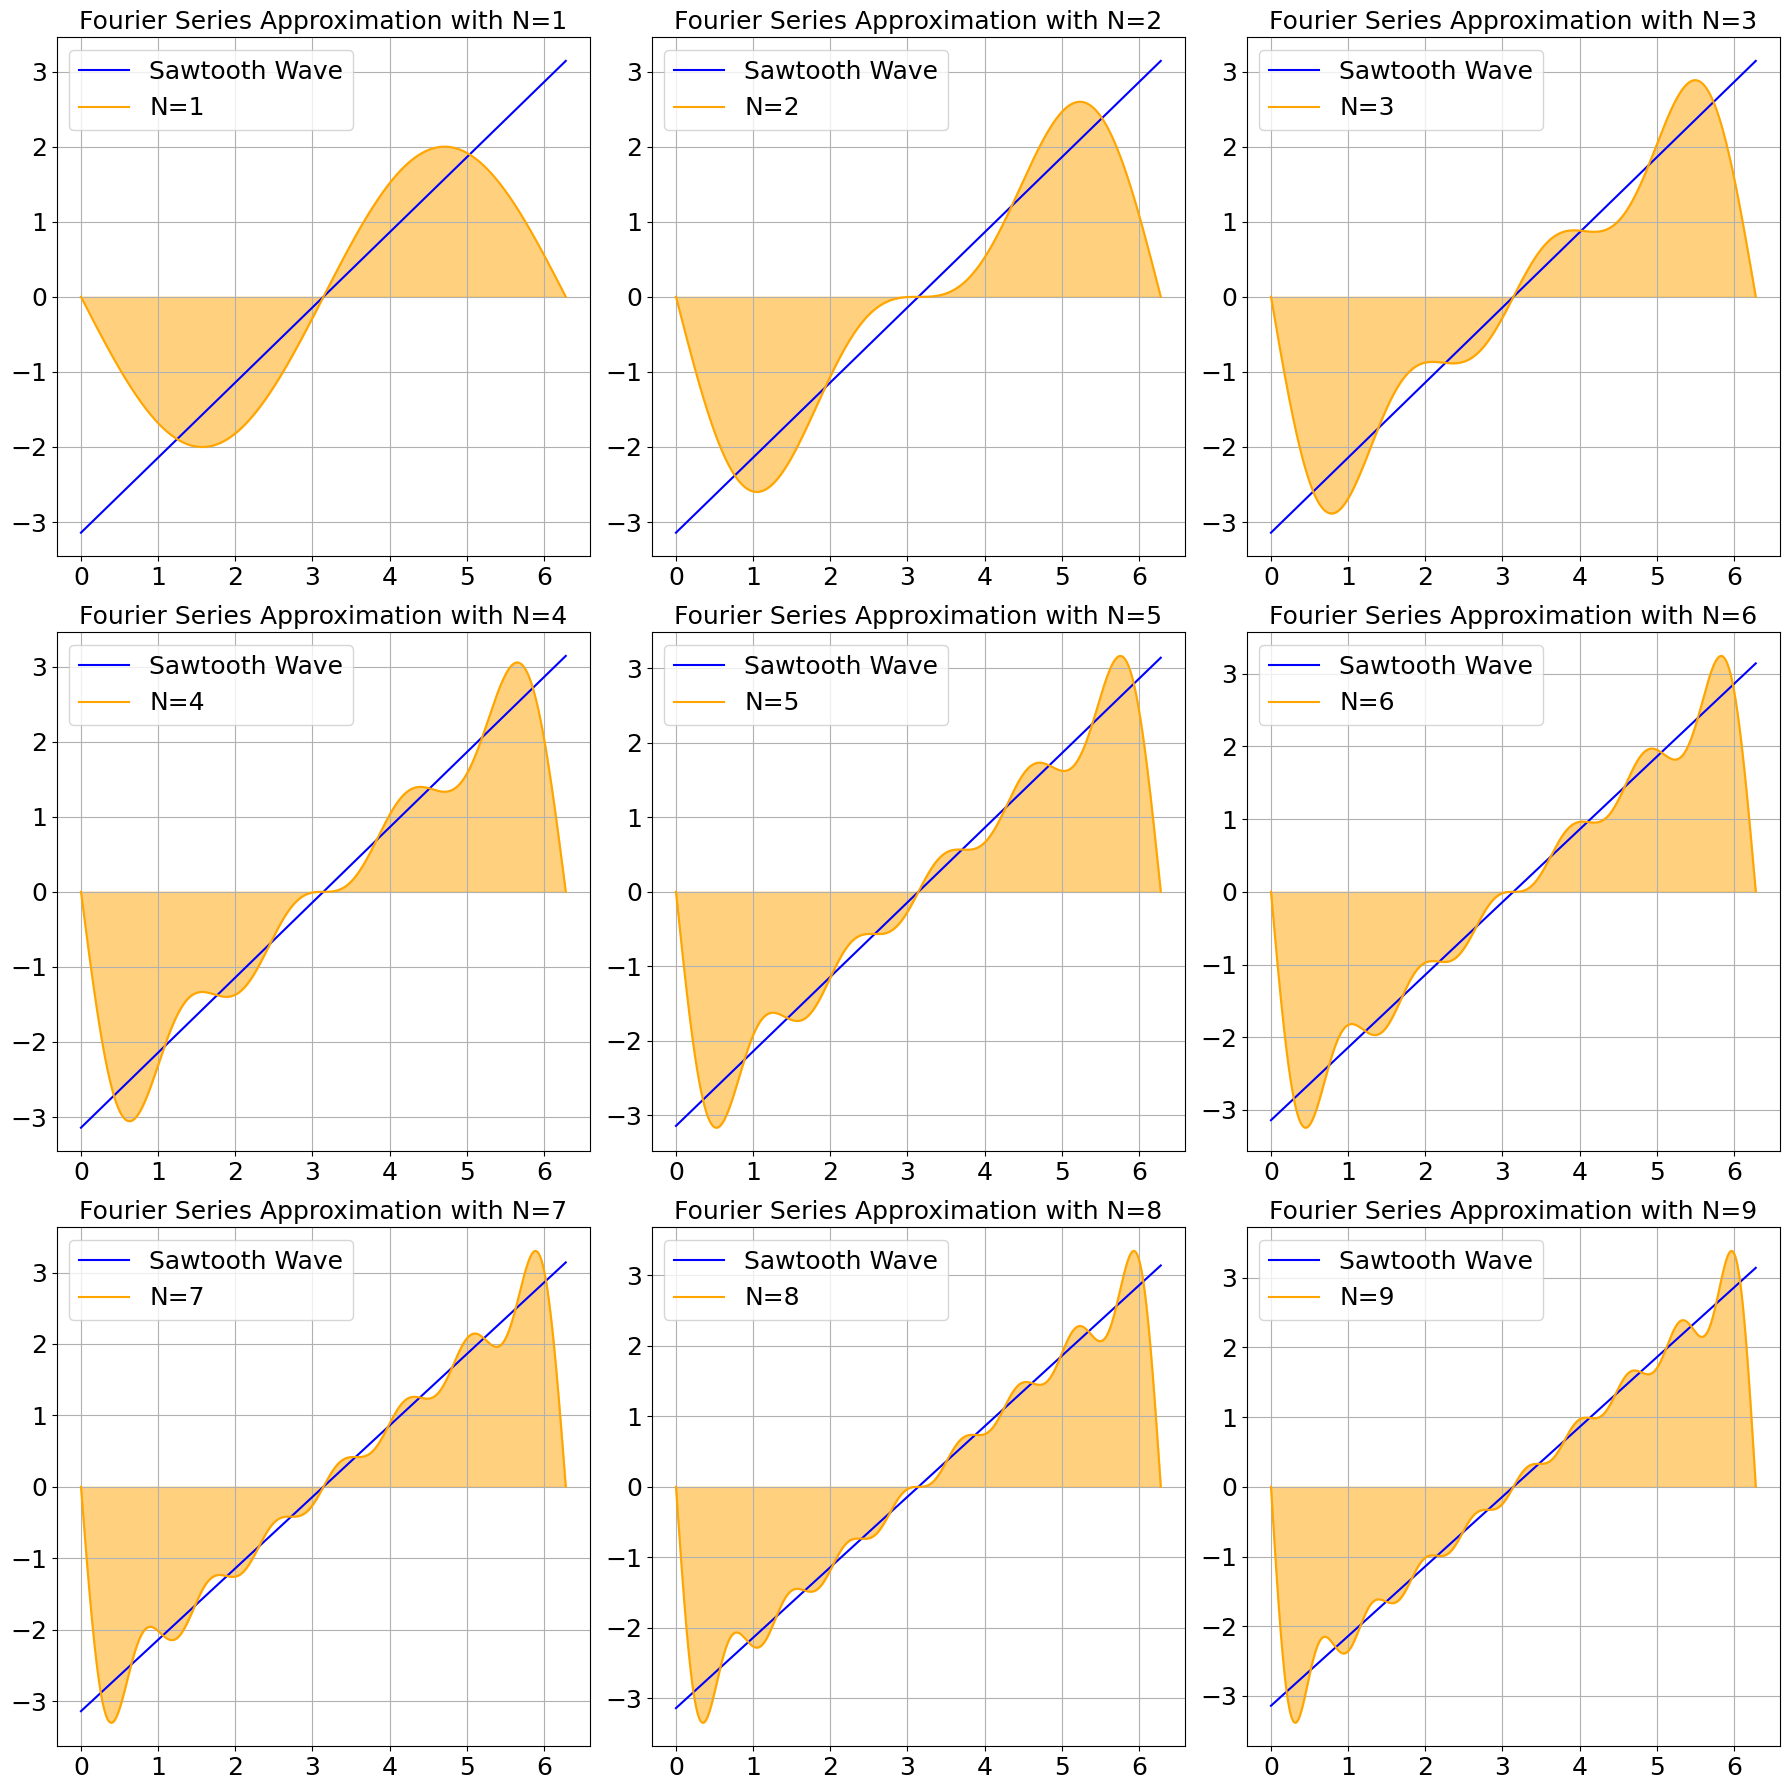

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sawtooth wave function
def sawtooth_wave(t):
    return t - np.pi

# Time array
t = np.linspace(0, 2 * np.pi, 1000)

# Calculate Fourier series approximation
def fourier_series_sawtooth_wave(t, N):
    y = np.zeros_like(t)
    for n in range(1, N+1):
        y += (-2 / n) * np.sin(n * t)
    return y

# Plotting
fig, axs = plt.subplots(3, 3, figsize=(18, 18))

# Font size
fontsize = 18

# Intermediate steps for visualization
Ns = [1, 2, 3, 4, 5, 6, 7, 8, 9]
for i, N in enumerate(Ns):
    ax = axs.flat[i]
    y = fourier_series_sawtooth_wave(t, N)
    ax.plot(t, sawtooth_wave(t), label='Sawtooth Wave', color='blue')
    ax.plot(t, y, label=f'N={N}', color='orange')
    ax.fill_between(t, 0, y, color='orange', alpha=0.5)
    ax.set_title(f'Fourier Series Approximation with N={N}', fontsize=fontsize)
    ax.legend(fontsize=fontsize)
    ax.tick_params(axis='both', which='major', labelsize=fontsize)
    ax.grid(True)

plt.tight_layout()
plt.show()

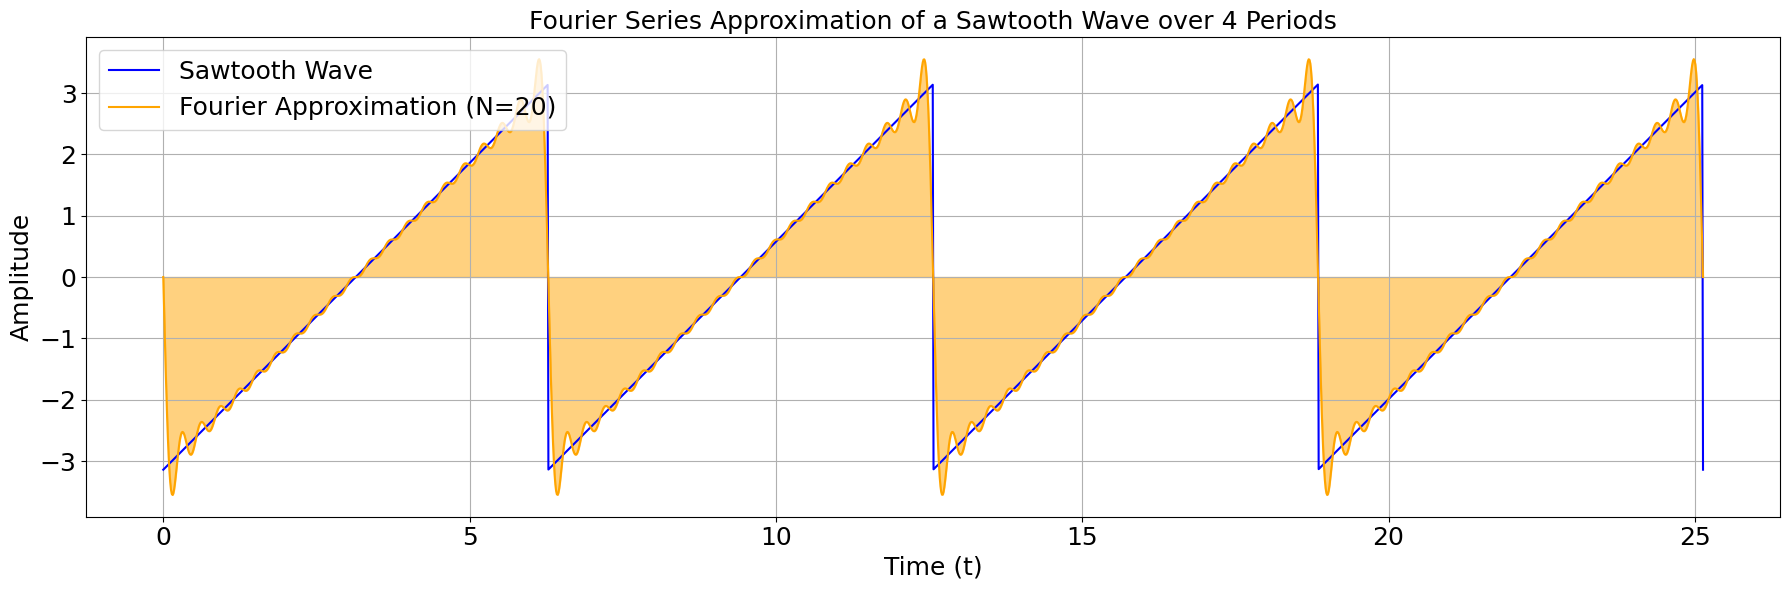

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sawtooth wave function
def sawtooth_wave(t):
    return t - np.floor(t / (2 * np.pi)) * 2 * np.pi - np.pi

# Extended time array for 4 periods
t = np.linspace(0, 8 * np.pi, 2000)

# Calculate Fourier series approximation
def fourier_series_sawtooth_wave(t, N):
    y = np.zeros_like(t)
    for n in range(1, N+1):
        y += (-2 / n) * np.sin(n * t)
    return y

# Plotting
fig, ax = plt.subplots(figsize=(18, 6))

# Number of harmonics
N = 20

# Plot Fourier series approximation for 4 periods
y = fourier_series_sawtooth_wave(t, N)
ax.plot(t, sawtooth_wave(t), label='Sawtooth Wave', color='blue')
ax.plot(t, y, label=f'Fourier Approximation (N={N})', color='orange')
ax.fill_between(t, 0, y, color='orange', alpha=0.5)

# Setting labels and titles
fontsize = 18
ax.set_xlabel('Time (t)', fontsize=fontsize)
ax.set_ylabel('Amplitude', fontsize=fontsize)
ax.set_title('Fourier Series Approximation of a Sawtooth Wave over 4 Periods', fontsize=fontsize)
ax.legend(fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.grid(True)

plt.tight_layout()
plt.show()
